In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client.PGAStats

wells_fargo= db.wellsFargo
wf_data = pd.DataFrame(list(wells_fargo.find()))
expanded= db.expanded
expanded_data = pd.DataFrame(list(expanded.find()))

In [3]:
wf_data[['year','name','total']]
wf_data2 = wf_data[(wf_data['total'])!='--'].copy()

In [4]:
data1 = pd.merge(wf_data2,expanded_data, on=['name','year'], how='inner')

In [11]:
data1

,total,driveAcc,gir,puttAvg,savePCT,yardPerDrive
0,272.0,58.1,66.0,1.712,60.9,309.7
1,274.0,63.4,69.4,1.746,48.9,302.9
2,274.0,56.3,68.0,1.755,43.8,307.5
3,276.0,61.9,70.1,1.754,49.6,305.5
4,277.0,51.6,65.0,1.693,59.5,300.7
5,277.0,62.8,68.2,1.769,53.3,304.3
6,277.0,52.4,68.2,1.780,56.6,302.0
7,278.0,54.4,63.5,1.744,57.5,298.3
8,279.0,69.9,69.2,1.752,56.0,294.8
9,279.0,54.7,68.8,1.791,53.1,314.7


In [9]:
data1 = data1.drop(['driveTotal','_id_x','_id_y'], axis=1)

In [10]:

data1 = data1[['total','driveAcc','gir','puttAvg','savePCT','yardPerDrive']].astype(float)

In [13]:
y = data1['total']
X =data1.drop(['total'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

In [51]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 300,random_state=0)
reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [52]:
y_hat = reg.predict(x_train)

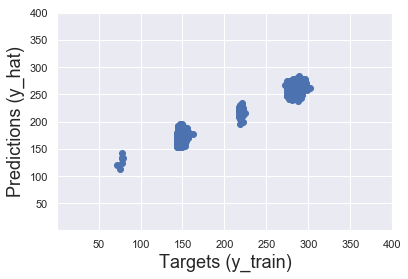

In [53]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(1,400)
plt.ylim(1,400)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

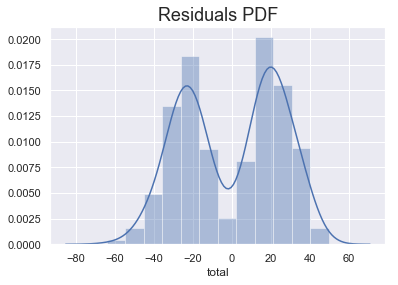

In [54]:
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

In [55]:
reg.score(x_train,y_train)

0.8632237708354773

In [56]:
y_hat_test = reg.predict(x_test)

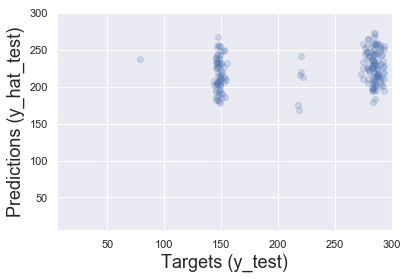

In [57]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,300)
plt.ylim(6,300)
plt.show()

In [58]:
df_pf = pd.DataFrame((y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,266.843333
1,194.453333
2,222.356667
3,204.733333
4,225.630000


In [59]:
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,266.843333,147.0
1,194.453333,148.0
2,222.356667,280.0
3,204.733333,282.0
4,225.630000,278.0
5,196.473333,283.0
6,168.926667,218.0
7,212.596667,287.0
8,215.996667,288.0
9,254.216667,293.0


In [60]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    147.0
1    148.0
2    280.0
3    282.0
4    278.0
Name: total, dtype: float64

In [61]:
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,266.843333,147.0
1,194.453333,148.0
2,222.356667,280.0
3,204.733333,282.0
4,225.630000,278.0
5,196.473333,283.0
6,168.926667,218.0
7,212.596667,287.0
8,215.996667,288.0
9,254.216667,293.0


In [62]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,266.843333,147.0,-119.843333,81.526077
1,194.453333,148.0,-46.453333,31.387387
2,222.356667,280.0,57.643333,20.586905
3,204.733333,282.0,77.266667,27.399527
4,225.630000,278.0,52.370000,18.838129
5,196.473333,283.0,86.526667,30.574794
6,168.926667,218.0,49.073333,22.510703
7,212.596667,287.0,74.403333,25.924506
8,215.996667,288.0,72.003333,25.001157
9,254.216667,293.0,38.783333,13.236633


In [81]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,188.000000,188.000000,188.000000,188.000000
mean,223.260337,230.627660,7.367323,30.319127
std,22.401773,66.455081,65.047555,21.248566
min,168.926667,79.000000,-158.300000,0.257576
25%,206.510833,149.000000,-58.315833,17.636045
50%,224.210000,279.000000,33.138333,25.345701
75%,241.315833,285.000000,61.273333,39.304629
max,272.856667,304.000000,103.783333,200.379747


In [64]:
#['total','driveAcc','gir','puttAvg','savePCT','yardPerDrive']
reg.predict([['52.5','61.3','1.756','54.4','308.6']])

array([262.40666667])

In [65]:
reg.predict([['56.3','68','1.755','43.8','307.5']])

array([257.89666667])

In [68]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [70]:
# Pull out one tree from the forest
tree = reg.estimators_[5]

In [72]:
feature_list = list(x_train.columns)

In [73]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [74]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [75]:
# Write graph to a png file
graph.write_png('tree.png')

In [77]:
# Get numerical feature importances
importances = list(reg.feature_importances_)

In [78]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [79]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [80]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: gir                  Importance: 0.22
Variable: puttAvg              Importance: 0.21
Variable: yardPerDrive         Importance: 0.2
Variable: savePCT              Importance: 0.19
Variable: driveAcc             Importance: 0.18
